In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks

In [18]:
df = pd.read_csv('star_classification.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [20]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [21]:
df = df.drop(["obj_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "spec_obj_ID", "plate", "MJD", "fiber_ID"], axis=1)

In [22]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["class"] = LE.fit_transform(df["class"])
X = df.drop("class", axis=1)
y = df["class"]

In [23]:
tl = TomekLinks(sampling_strategy='majority')
X_resampled, y_resampled = tl.fit_resample(X, y)
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced["class"] = y_resampled

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced.drop("class", axis=1), df_balanced["class"], test_size=0.2, random_state=42)

In [25]:
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4114583333333333, 0.9285714285714286, 'x[7] <= 0.004\ngini = 0.574\nsamples = 77695\nvalue = [45211.0, 15159.0, 17325.0]'),
 Text(0.15625, 0.7857142857142857, 'x[7] <= -0.0\ngini = 0.037\nsamples = 17661\nvalue = [333, 3, 17325]'),
 Text(0.28385416666666663, 0.8571428571428572, 'True  '),
 Text(0.07291666666666667, 0.6428571428571429, 'x[7] <= -0.004\ngini = 0.005\nsamples = 10960\nvalue = [26, 0, 10934]'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(0.08333333333333333, 0.5, 'x[7] <= -0.002\ngini = 0.004\nsamples = 10956\nvalue = [22.0, 0.0, 10934.0]'),
 Text(0.041666666666666664, 0.35714285714285715, 'x[3] <= 25.386\ngini = 0.129\nsamples = 72\nvalue = [5, 0, 67]'),
 Text(0.020833333333333332, 0.21428571428571427, 'x[0] <= 12.025\ngini = 0.083\nsamples = 69\nvalue = [3, 0, 66]'),
 Text(0.010416666666666666, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.03125, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.0625, 0.21428571428571427, 'x[0] <= 153.24

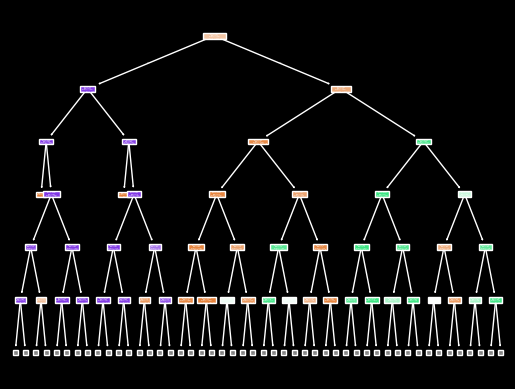

In [26]:
from sklearn.tree import plot_tree
plot_tree(Dt, filled=True, max_depth=5)

In [27]:
for value in LE.inverse_transform(Dt.predict(X_test)):
    print(value)

GALAXY
STAR
GALAXY
GALAXY
QSO
GALAXY
GALAXY
GALAXY
STAR
QSO
STAR
QSO
GALAXY
GALAXY
STAR
QSO
STAR
GALAXY
QSO
GALAXY
GALAXY
STAR
GALAXY
GALAXY
QSO
QSO
STAR
STAR
GALAXY
QSO
GALAXY
STAR
GALAXY
STAR
GALAXY
GALAXY
GALAXY
GALAXY
GALAXY
STAR
GALAXY
GALAXY
GALAXY
STAR
GALAXY
QSO
GALAXY
STAR
GALAXY
GALAXY
GALAXY
GALAXY
GALAXY
STAR
GALAXY
STAR
GALAXY
GALAXY
GALAXY
STAR
STAR
GALAXY
QSO
STAR
STAR
GALAXY
QSO
GALAXY
STAR
GALAXY
STAR
STAR
GALAXY
QSO
STAR
GALAXY
STAR
GALAXY
GALAXY
STAR
GALAXY
GALAXY
QSO
GALAXY
GALAXY
QSO
QSO
QSO
QSO
STAR
QSO
GALAXY
GALAXY
GALAXY
GALAXY
GALAXY
QSO
QSO
QSO
QSO
GALAXY
QSO
GALAXY
QSO
GALAXY
STAR
GALAXY
STAR
GALAXY
STAR
QSO
GALAXY
GALAXY
QSO
GALAXY
STAR
GALAXY
QSO
GALAXY
GALAXY
GALAXY
STAR
QSO
STAR
GALAXY
GALAXY
STAR
GALAXY
STAR
GALAXY
GALAXY
GALAXY
STAR
GALAXY
GALAXY
GALAXY
QSO
QSO
GALAXY
GALAXY
STAR
GALAXY
QSO
GALAXY
GALAXY
GALAXY
GALAXY
GALAXY
QSO
STAR
QSO
GALAXY
GALAXY
QSO
STAR
GALAXY
QSO
GALAXY
GALAXY
GALAXY
QSO
GALAXY
GALAXY
GALAXY
GALAXY
GALAXY
STAR
GALAXY
GALAXY
STA